In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier

In [9]:
#import the data set
t=sns.load_dataset("titanic")
t.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
#Preprocessing the data
#usig the knn imputer fill the missing values
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)

#impute the fare and age column
t['age']=imputer.fit_transform(t[["age"]])

#using pandas fill the missing value
t['embark_town']=t["embark_town"].fillna(t['embark_town'].mode()[0])
t["embarked"]=t["embarked"].fillna(t["embarked"].mode()[0])

#drop the deck column because it has most element are missing
t.drop("deck",axis=1,inplace=True)

#Check the missing values
t.isnull().sum()


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [11]:
#Convert the each category or object into category
categorys=t.select_dtypes(include=['object','category']).columns
#add the new column in the data
t[categorys]=t[categorys].astype("category")

In [12]:
#separate the X and Y
X=t.drop("survived",axis=1)
y=t['survived']

#Train test and split the data 
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Build the model
model=CatBoostClassifier( iterations=100,learning_rate=0.1,depth=3,loss_function='Logloss',eval_metric="Accuracy",
                         random_seed=42,
                         verbose=False
                         )


model.fit(X_train,Y_train,cat_features=categorys.tolist())
#predict the model
Y_pred=model.predict(X_test)

print("accuracy_score",accuracy_score(Y_test,Y_pred))
print("classification_report = \n",classification_report(Y_test,Y_pred))

accuracy_score 1.0
classification_report = 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



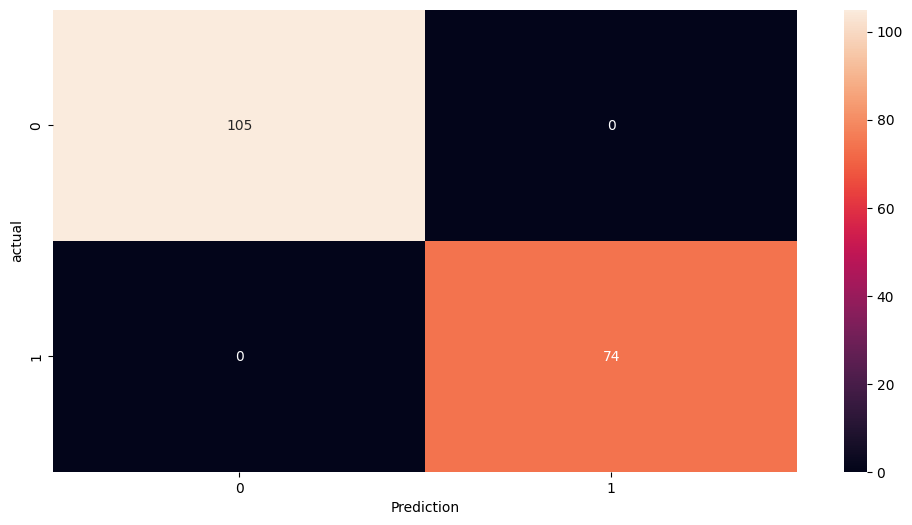

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,fmt="d")
plt.xlabel("Prediction")
plt.ylabel("actual")
plt.show()

# Predication

In [16]:
model.predict([[3,	'male',	22.0,	1,	0,	7.2500,	'S',	'Third',	'man',	True,	'Southampton',	'no',	False]])

array([0], dtype=int64)